# NLFT Examples

This notebook goes through all of the examples and demonstrates that even if our constraints are violated (by not oversampling or rescaling our target functions), the NLFT method with Weiss still results in an accurate function.

In [52]:
!pip install -e .

Obtaining file:///Users/jameslarsen/Desktop/LBL/qsppack
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for qsppack (pyproject.toml) ... done
  Created wheel for qsppack: filename=qsppack-0.3.12-0.editable-py3-none-any.whl size=3446 sha256=b216bdaa468ef49db69862ddffb2e1fd28861f707d73379fd67a61a89a9ab49d
  Stored in directory: /private/var/folders/bz/68lg1ys109jbpl3rbpx1jjmw0000gn/T/pip-ephem-wheel-cache-lgpi_xdc/wheels/80/31/61/69b6e2fff14a2137693432a0f7592930269847699f6173530f
Successfully built qsppack
  Attempting uninstall: qsppack
    Found existing installation: qsppack 0.3.12
    Uninstalling qsppack-0.3.12:
      Successfully uninstalled qsppack-0.3.12


In [1]:
import numpy as np
from qsppack.utils import cvx_poly_coef
from qsppack.solver import solve
from qsppack.utils import chebyshev_to_func, get_entry
import matplotlib.pyplot as plt

Outline:
1. Linear System Problem                (works like a charm)
2. Negative Power Functions             (works like a charm)
3. Hamiltonian Simulation               (constraints not violated)
4. Quantum Gaussian Filter              (constraints not violated)
5. Singular Value Threshold Projector   (works like a charm)
6. Singular Vector Transformation       (constraints not violated)
7. Uniform Singular Value Amplification (works like a charm)
8. Gaussian State                       ()
9. Kaiser Window State                  ()
10. Gibbs State                         ()

## Linear Systems Problem

In [2]:
kappa = 10
targ = lambda x: 1/(kappa*x)
deg = 71
parity = deg % 2
opts = {
    'intervals': [1/kappa, 1],
    'objnorm': np.inf,
    'epsil': 0.01,
    'npts': 71,
    'fscale': 1,
    'isplot': False,
    'method': 'cvxpy'
}
coef_full = cvx_poly_coef(targ, deg, opts)
coef = coef_full[parity::2]


opts.update({
    'N': 2**9,
    'method': 'NLFT',
    'targetPre': False,
    'typePhi': 'reduced'})
phi_proc, out = solve(coef, parity, opts)
out['typePhi'] = 'full'


xlist = np.linspace(0, 1, 1000)
func = lambda x: chebyshev_to_func(x, coef, parity, True)
targ_value = targ(xlist)
func_value = func(xlist)
QSP_value = get_entry(xlist, np.real(phi_proc), out)
err = np.linalg.norm(QSP_value - func_value, np.inf)
print('The residual error is')
print(err)

# plt.plot(xlist, QSP_value - func_value)
# plt.xlabel('$x$', fontsize=12)
# plt.ylabel('$g(x,\\Phi^*)-f_\\mathrm{poly}(x)$', fontsize=12)
# plt.show()

norm error = 0.010000000005610632
max of solution = 0.9899999999943894


/var/folders/bz/68lg1ys109jbpl3rbpx1jjmw0000gn/T/ipykernel_50775/2400647397.py:2: RuntimeWarning: divide by zero encountered in divide
  targ = lambda x: 1/(kappa*x)


The residual error is
0.024624629226102424


/var/folders/bz/68lg1ys109jbpl3rbpx1jjmw0000gn/T/ipykernel_50775/2400647397.py:2: RuntimeWarning: divide by zero encountered in divide
  targ = lambda x: 1/(kappa*x)


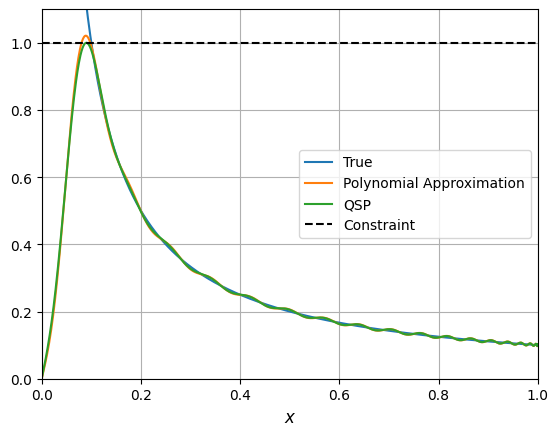

In [3]:
plt.plot(xlist, targ(xlist), label='True')
plt.plot(xlist, func_value, label='Polynomial Approximation')
plt.plot(xlist, QSP_value, label='QSP')
plt.plot(xlist, np.ones(len(xlist)), "k--", label='Constraint')
plt.xlabel('$x$', fontsize=12)
plt.grid()
plt.legend(loc="best")
plt.ylim([0, 1.1])
plt.xlim([0, 1])
plt.show()

## Negative Power Functions

In [4]:
kappa = 10
targ = lambda x: 1/(x**2)
deg = 70
parity = deg % 2

opts = {
    'intervals': [1/kappa, 1],
    'objnorm': np.inf,
    'epsil': 0.01,
    'npts': 70,
    'fscale': 1/(kappa**2),
    'isplot': False,
    'method': 'cvxpy'
}
coef_full = cvx_poly_coef(targ, deg, opts)
coef = coef_full[parity::2]


opts.update({
    'N': 2**9,
    'method': 'NLFT',
    'targetPre': False,
    'typePhi': 'reduced'})
phi_proc, out = solve(coef, parity, opts)
out['typePhi'] = 'full'


xlist = np.linspace(0, 1, 1000)
func = lambda x: chebyshev_to_func(x, coef, parity, True)
targ_value = targ(xlist)
func_value = func(xlist)
QSP_value = get_entry(xlist, np.real(phi_proc), out)
err = np.linalg.norm(QSP_value - func_value, np.inf)
print('The residual error is')
print(err)

norm error = 0.019861397887987464
max of solution = 0.9899999992053649


/var/folders/bz/68lg1ys109jbpl3rbpx1jjmw0000gn/T/ipykernel_50775/2730026234.py:2: RuntimeWarning: divide by zero encountered in divide
  targ = lambda x: 1/(x**2)


The residual error is
0.08321406958829414


/var/folders/bz/68lg1ys109jbpl3rbpx1jjmw0000gn/T/ipykernel_50775/2730026234.py:2: RuntimeWarning: divide by zero encountered in divide
  targ = lambda x: 1/(x**2)


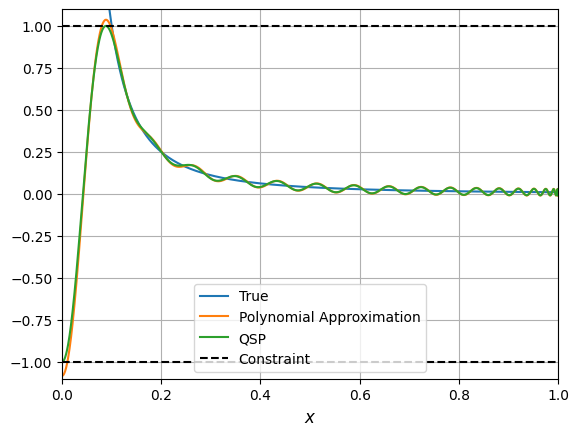

In [5]:
plt.plot(xlist, targ(xlist)*opts['fscale'], label='True')
plt.plot(xlist, func_value, label='Polynomial Approximation')
plt.plot(xlist, QSP_value, label='QSP')
plt.plot(xlist, np.ones(len(xlist)), "k--", label='Constraint')
plt.plot(xlist, -np.ones(len(xlist)), "k--")
plt.xlabel('$x$', fontsize=12)
plt.grid()
plt.legend(loc="best")
plt.ylim([-1.1, 1.1])
plt.xlim([0, 1])
plt.show()

## Hamiltonian Simulation

This example is not very interesting since it doesn't violate our constraint.

In [6]:
tau = 10
targ = lambda x: np.cos(tau*x)
deg = 150
parity = deg % 2

opts = {
    'intervals': [0, 1],
    'objnorm': np.inf,
    'epsil': 0.01,
    'npts': 150,
    'fscale': 1,
    'isplot': False,
    'method': 'cvxpy'
}
coef_full = cvx_poly_coef(targ, deg, opts)
coef = coef_full[parity::2]


opts.update({
    'N': 2**9,
    'method': 'NLFT',
    'targetPre': False,
    'typePhi': 'reduced'})
phi_proc, out = solve(coef, parity, opts)
out['typePhi'] = 'full'


xlist = np.linspace(0, 1, 1000)
func = lambda x: chebyshev_to_func(x, coef, parity, True)
targ_value = targ(xlist)
func_value = func(xlist)
QSP_value = get_entry(xlist, np.real(phi_proc), out)
err = np.linalg.norm(QSP_value - func_value, np.inf)
print('The residual error is')
print(err)

norm error = 0.010000000013508314
max of solution = 0.9899999999864917
The residual error is
1.0608436351589035e-10


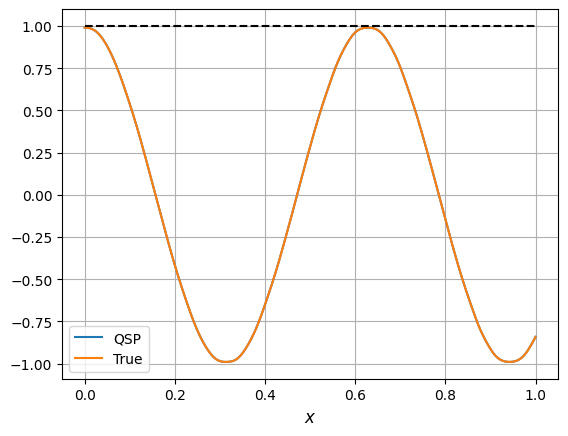

In [7]:
plt.plot(xlist, QSP_value, label='QSP')
plt.plot(xlist, func_value, label='True')
plt.plot(xlist, np.ones(len(xlist)), "k--")
plt.xlabel('$x$', fontsize=12)
plt.grid()
plt.legend(loc="best")
plt.show()

## Quantum Gaussian Filter

This example is not very interesting since it doesn't violate our constraint.

In [8]:
targ = lambda x: np.exp(-(np.abs(x) - 0.5)**2 / 0.1**2)
deg = 70
parity = deg % 2

opts = {
    'intervals': [0, 1],
    'objnorm': np.inf,
    'epsil': 0.01,
    'npts': 70,
    'fscale': 1,
    'isplot': False,
    'method': 'cvxpy'
}
coef_full = cvx_poly_coef(targ, deg, opts)
coef = coef_full[parity::2]


opts.update({
    'N': 2**9,
    'method': 'NLFT',
    'targetPre': False,
    'typePhi': 'reduced'})
phi_proc, out = solve(coef, parity, opts)
out['typePhi'] = 'full'


xlist = np.linspace(0, 1, 1000)
func = lambda x: chebyshev_to_func(x, coef, parity, True)
targ_value = targ(xlist)
func_value = func(xlist)
QSP_value = get_entry(xlist, np.real(phi_proc), out)
err = np.linalg.norm(QSP_value - func_value, np.inf)
print('The residual error is')
print(err)

norm error = 0.005770689376769722
max of solution = 0.9899999999690915
The residual error is
6.077068531729068e-07


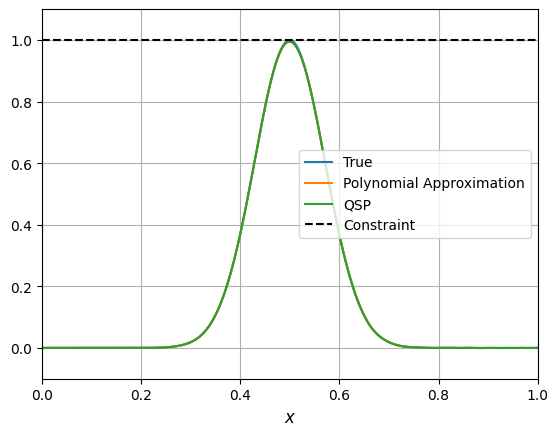

In [10]:
plt.plot(xlist, targ(xlist)*opts['fscale'], label='True')
plt.plot(xlist, func_value, label='Polynomial Approximation')
plt.plot(xlist, QSP_value, label='QSP')
plt.plot(xlist, np.ones(len(xlist)), "k--", label='Constraint')
plt.plot(xlist, -np.ones(len(xlist)), "k--")
plt.xlabel('$x$', fontsize=12)
plt.grid()
plt.legend(loc="best")
plt.ylim([-0.1, 1.1])
plt.xlim([0, 1])
plt.show()

## Singular Value Threshold Projector

Something weird is going on with my convex optimization routine for this one... Definitely warrants more thought.

In [4]:
delta = 0.05
targ = np.vectorize(lambda x: 1 if np.abs(x) < 0.5 else 0)
deg = 250
parity = deg % 2

opts = {
    'intervals': [0, 0.5-delta, 0.5+delta, 1],
    'objnorm': np.inf,
    'epsil': 0,
    'npts': 250,
    'fscale': 1,
    'maxiter': 100,
    'isplot': False,
    'method': 'cvxpy'
}
coef_full = cvx_poly_coef(targ, deg, opts)
coef = coef_full[parity::2]


opts.update({
    'N': 2**9,
    'method': 'NLFT',
    'targetPre': False,
    'typePhi': 'reduced'})
phi_proc, out = solve(coef, parity, opts)
out['typePhi'] = 'full'


xlist = np.linspace(0, 1, 1000)
func = lambda x: chebyshev_to_func(x, coef, parity, True)
targ_value = targ(xlist)
func_value = func(xlist)
QSP_value = get_entry(xlist, np.real(phi_proc), out)
err = np.linalg.norm(QSP_value - func_value, np.inf)
print('The residual error is')
print(err)

norm error = 2.453988867667789e-08
max of solution = 0.9999999999243476
The residual error is
0.03555585210720352


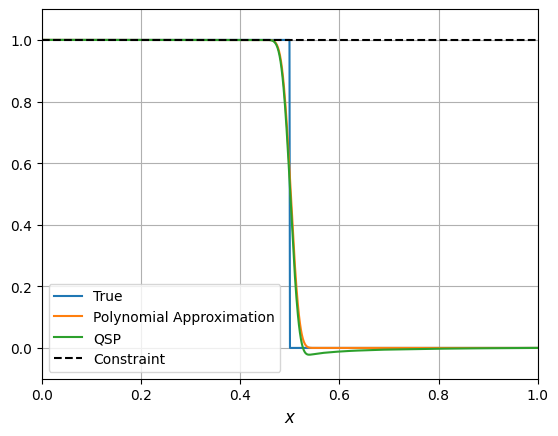

In [5]:
plt.plot(xlist, targ(xlist)*opts['fscale'], label='True')
plt.plot(xlist, func_value, label='Polynomial Approximation')
plt.plot(xlist, QSP_value, label='QSP')
plt.plot(xlist, np.ones(len(xlist)), "k--", label='Constraint')
plt.plot(xlist, -np.ones(len(xlist)), "k--")
plt.xlabel('$x$', fontsize=12)
plt.grid()
plt.legend(loc="best")
plt.ylim([-0.1, 1.1])
plt.xlim([0, 1])
plt.show()

## Singular Vector Transformation

In [6]:
delta = 0.1
targ = lambda x: np.sign(x)
deg = 251
parity = deg % 2

opts = {
    'intervals': [delta, 1],
    'objnorm': np.inf,
    'epsil': 0,
    'npts': 251,
    'isplot': False,
    'fscale': 1,
    'method': 'cvxpy'
}
coef_full = cvx_poly_coef(targ, deg, opts)
coef = coef_full[parity::2]


opts.update({
    'N': 2**9,
    'method': 'NLFT',
    'targetPre': False,
    'typePhi': 'reduced'})
phi_proc, out = solve(coef, parity, opts)
out['typePhi'] = 'full'


xlist = np.linspace(0, 1, 1000)
func = lambda x: chebyshev_to_func(x, coef, parity, True)
targ_value = targ(xlist)
func_value = func(xlist)
QSP_value = get_entry(xlist, np.real(phi_proc), out)
err = np.linalg.norm(QSP_value - func_value, np.inf)
print('The residual error is')
print(err)

/Users/jameslarsen/miniconda3/envs/qspy/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


norm error = 7.301126259129376e-09
max of solution = 0.999999997972234
The residual error is
1.8077426156448695e-05


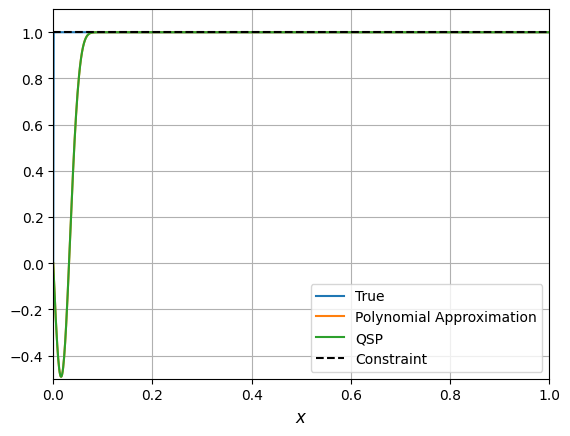

In [15]:
plt.plot(xlist, targ(xlist)*opts['fscale'], label='True')
plt.plot(xlist, func_value, label='Polynomial Approximation')
plt.plot(xlist, QSP_value, label='QSP')
plt.plot(xlist, np.ones(len(xlist)), "k--", label='Constraint')
plt.plot(xlist, -np.ones(len(xlist)), "k--")
plt.xlabel('$x$', fontsize=12)
plt.grid()
plt.legend(loc="best")
plt.ylim([-0.5, 1.1])
plt.xlim([0, 1])
plt.show()

## Uniform Singular Value Amplification

In [18]:
a = 0.2
targ = lambda x: x / a
deg = 101
parity = deg % 2

opts = {
    'intervals': [0, a],
    'objnorm': np.inf,
    'epsil': 0,
    'npts': 101,
    'isplot': False,
    'fscale': 1,
    'method': 'cvxpy'
}
coef_full = cvx_poly_coef(targ, deg, opts)
coef = coef_full[parity::2]


opts.update({
    'N': 2**9,
    'method': 'NLFT',
    'targetPre': False,
    'typePhi': 'reduced'})
phi_proc, out = solve(coef, parity, opts)
out['typePhi'] = 'full'


xlist = np.linspace(0, 1, 1000)
func = lambda x: chebyshev_to_func(x, coef, parity, True)
targ_value = targ(xlist)
func_value = func(xlist)
QSP_value = get_entry(xlist, np.real(phi_proc), out)
err = np.linalg.norm(QSP_value - func_value, np.inf)
print('The residual error is')
print(err)

norm error = 0.0013526970109043468
max of solution = 0.9999999997341179


The residual error is
0.35807144630707755


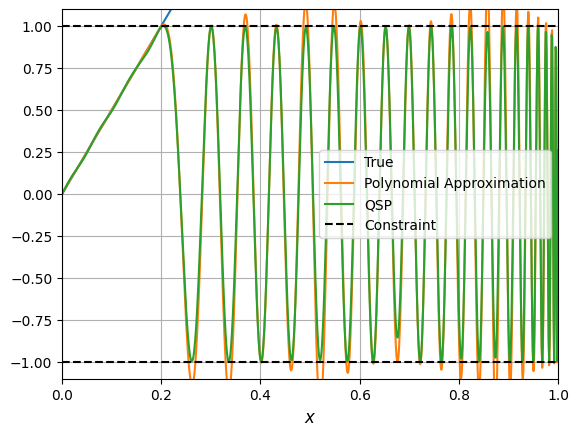

In [19]:
plt.plot(xlist, targ(xlist)*opts['fscale'], label='True')
plt.plot(xlist, func_value, label='Polynomial Approximation')
plt.plot(xlist, QSP_value, label='QSP')
plt.plot(xlist, np.ones(len(xlist)), "k--", label='Constraint')
plt.plot(xlist, -np.ones(len(xlist)), "k--")
plt.xlabel('$x$', fontsize=12)
plt.grid()
plt.legend(loc="best")
plt.ylim([-1.1, 1.1])
plt.xlim([0, 1])
plt.show()